# Data Cleaning

# Preprocessing

# Feature Extraction

# EDA

# Model Development

# Reading the Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Data/male_players (legacy)_23.csv')

C:\Users\DELL\AppData\Local\Temp\ipykernel_15232\2381314226.py:6: DtypeWarning: Columns (108) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Data/male_players (legacy)_23.csv')


In [4]:
df.head()

,player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url
0,158023,/player/158023/lionel-messi/150002,15,2,2014-09-18,L. Messi,Lionel Andrés Messi Cuccittini,CF,93,95,...,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3,15+3,https://cdn.sofifa.net/players/158/023/15_120.png
1,20801,/player/20801/c-ronaldo-dos-santos-aveiro/150002,15,2,2014-09-18,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"LW, LM",92,92,...,63+3,63+3,63+3,57+3,52+3,52+3,52+3,57+3,16+3,https://cdn.sofifa.net/players/020/801/15_120.png
2,9014,/player/9014/arjen-robben/150002,15,2,2014-09-18,A. Robben,Arjen Robben,"RM, LM, RW",90,90,...,64+3,64+3,64+3,55+3,46+3,46+3,46+3,55+3,14+3,https://cdn.sofifa.net/players/009/014/15_120.png
3,41236,/player/41236/zlatan-ibrahimovic/150002,15,2,2014-09-18,Z. Ibrahimović,Zlatan Ibrahimović,ST,90,90,...,65+3,65+3,61+3,56+3,55+3,55+3,55+3,56+3,17+3,https://cdn.sofifa.net/players/041/236/15_120.png
4,167495,/player/167495/manuel-neuer/150002,15,2,2014-09-18,M. Neuer,Manuel Peter Neuer,GK,90,90,...,40+3,40+3,36+3,36+3,38+3,38+3,38+3,36+3,87+3,https://cdn.sofifa.net/players/167/495/15_120.png


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161583 entries, 0 to 161582
Columns: 110 entries, player_id to player_face_url
dtypes: float64(18), int64(45), object(47)
memory usage: 135.6+ MB


<AxesSubplot:>

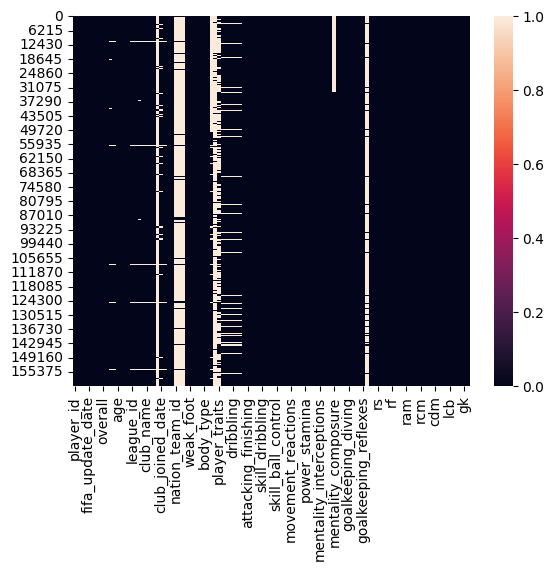

In [8]:
sns.heatmap(df.isnull(), cbar = False)
# Data has lots of missing values

In [10]:
# Total number of nulls
df.isnull().sum().sum()

1218702

In [11]:
# Nulls in each column
nulls = df.isnull().sum() 
print(nulls[nulls > 0])

value_eur                           2053
wage_eur                            1761
league_id                           1773
league_name                         1773
league_level                        2717
club_team_id                        1773
club_name                           1773
club_position                       1773
club_jersey_number                  1773
club_loaned_from                  152045
club_joined_date                   11311
club_contract_valid_until_year      1773
nation_team_id                    152267
nation_position                   152267
nation_jersey_number              152267
release_clause_eur                 57961
player_tags                       148920
player_traits                      88433
pace                               17969
shooting                           17969
passing                            17969
dribbling                          17969
defending                          17969
physic                             17969
mentality_compos

In [12]:
# Showing it as percentages
print(nulls[nulls > 0] / len(df) * 100)

value_eur                          1.270554
wage_eur                           1.089842
league_id                          1.097269
league_name                        1.097269
league_level                       1.681489
club_team_id                       1.097269
club_name                          1.097269
club_position                      1.097269
club_jersey_number                 1.097269
club_loaned_from                  94.097151
club_joined_date                   7.000118
club_contract_valid_until_year     1.097269
nation_team_id                    94.234542
nation_position                   94.234542
nation_jersey_number              94.234542
release_clause_eur                35.870729
player_tags                       92.163161
player_traits                     54.729148
pace                              11.120601
shooting                          11.120601
passing                           11.120601
dribbling                         11.120601
defending                       

In [15]:
# Checking for duplicates
df.duplicated().sum()
# No duplicates found

0

In [16]:
df.describe()

,player_id,fifa_version,fifa_update,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
count,161583.000000,161583.000000,161583.0,161583.000000,161583.000000,1.595300e+05,159822.000000,161583.000000,161583.000000,161583.000000,...,128722.000000,161583.000000,161583.000000,161583.000000,161583.00000,161583.000000,161583.000000,161583.000000,161583.000000,17969.000000
mean,214484.722353,19.125514,2.0,65.699071,70.744008,2.326770e+06,10855.409768,25.123181,181.240205,75.235031,...,57.816892,45.757957,47.669996,45.698588,16.52961,16.274918,16.140374,16.288861,16.636973,39.149090
std,34928.608856,2.559318,0.0,7.040855,6.259121,6.005746e+06,21941.656285,4.670207,6.750148,7.000456,...,12.329739,20.453699,21.336404,20.935273,17.67047,16.834294,16.476466,16.998697,17.980143,10.503788
min,2.000000,15.000000,2.0,40.000000,40.000000,1.000000e+03,500.000000,16.000000,154.000000,49.000000,...,3.000000,1.000000,2.000000,3.000000,1.00000,1.000000,1.000000,1.000000,1.000000,12.000000
25%,199159.000000,17.000000,2.0,61.000000,66.000000,3.250000e+05,2000.000000,21.000000,176.000000,70.000000,...,50.000000,26.000000,27.000000,25.000000,8.00000,8.000000,8.000000,8.000000,8.000000,31.000000
50%,220621.000000,19.000000,2.0,66.000000,70.000000,7.250000e+05,4000.000000,25.000000,181.000000,75.000000,...,59.000000,50.000000,54.000000,52.000000,11.00000,11.000000,11.000000,11.000000,11.000000,41.000000
75%,236958.000000,21.000000,2.0,70.000000,75.000000,1.800000e+06,10000.000000,28.000000,186.000000,80.000000,...,66.000000,63.000000,66.000000,64.000000,14.00000,14.000000,14.000000,14.000000,14.000000,46.000000
max,271817.000000,23.000000,2.0,94.000000,95.000000,1.940000e+08,575000.000000,54.000000,208.000000,110.000000,...,96.000000,94.000000,94.000000,95.000000,91.00000,92.000000,95.000000,92.000000,94.000000,68.000000


In [20]:
# making a heatmap of the correlation matrix
sns.heatmap(df.corr(), cbar = True, annot = True, cmap='RdPu', linewidths=1, linecolor='black')
plt.title('Correlation Matrix')
plt.show()


ValueError: could not convert string to float: '/player/158023/lionel-messi/150002'